### I Am Not Doing EDA In This Notebook File, Because EDA Is Already Given And Also I Have Done EDA On Another Notebook File, This Is A Notebook For Questions Solution

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warning
warning.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# read dataset from external storage
dff = pd.read_csv('C:/Users/mridh/Downloads/EDA+ML-Final Project/nyc_taxi_trip_duration.csv')

### **First I Am Taking 50000 Sample Data Randomly From Given Dataset For Model Building And Prediction, Because Given Dataset Is To Large For  Model Building & Prediction** 

In [3]:
# creating sample dataset
# data = dff.sample(n = 50000)

In [4]:
# making csv file from sample dataset
# data.to_csv('nyc_taxi_trip_sample_data.csv', index = False)

In [5]:
# import new sample dataset
df = pd.read_csv('nyc_taxi_trip_sample_data.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id0045738,1,2016-01-12 15:25:16,2016-01-12 15:36:29,1,-73.967026,40.772392,-73.956032,40.769524,N,673
1,id2483471,2,2016-03-31 11:43:59,2016-03-31 12:01:09,1,-73.971046,40.787750,-73.951271,40.771992,N,1030
2,id0697786,1,2016-01-11 19:24:16,2016-01-11 19:31:12,2,-73.998093,40.757507,-73.985916,40.746597,N,416
3,id0550679,2,2016-02-09 18:07:40,2016-02-09 18:11:28,1,-73.990631,40.738735,-73.990746,40.738056,N,228
4,id0786941,2,2016-02-26 17:46:13,2016-02-26 17:58:54,1,-73.959160,40.763332,-73.974319,40.752491,N,761


In [6]:
# check shape of dataframe
df.shape

(50000, 11)

## Handle Missing And Duplicate Values

In [7]:
# check null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
# check duplicate values
df.duplicated().sum()

0

**We can see there are no null and duplicate values**

In [9]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day_of_month'] = df['pickup_datetime'].dt.day

In [10]:
df = df.drop(['id','pickup_datetime','dropoff_datetime'], axis = 1)

In [11]:
# check information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendor_id           50000 non-null  int64  
 1   passenger_count     50000 non-null  int64  
 2   pickup_longitude    50000 non-null  float64
 3   pickup_latitude     50000 non-null  float64
 4   dropoff_longitude   50000 non-null  float64
 5   dropoff_latitude    50000 non-null  float64
 6   store_and_fwd_flag  50000 non-null  object 
 7   trip_duration       50000 non-null  int64  
 8   day_of_week         50000 non-null  int64  
 9   hour_of_day         50000 non-null  int64  
 10  year                50000 non-null  int64  
 11  month               50000 non-null  int64  
 12  day_of_month        50000 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 5.0+ MB


## Handle Incorrect Values

In [12]:
# check value counts in vendor_id column
df.vendor_id.value_counts()

2    26821
1    23179
Name: vendor_id, dtype: int64

In [13]:
# check value counts in passenger_count column
df.passenger_count.value_counts()

1    35539
2     7164
5     2687
3     2004
6     1617
4      983
0        6
Name: passenger_count, dtype: int64

### We can see there is only 6 data for passenger count 0, so we have to drop it because it can misslead our model

In [14]:
# drop outliers from passenger count column
df = df[(df['passenger_count']>=1) & (df['passenger_count']<=6)]

In [15]:
# check value counts in pickup_longitude column
df.pickup_longitude.value_counts()

-73.982201    27
-73.991508    26
-73.982178    25
-73.982338    25
-73.982208    24
              ..
-73.960274     1
-73.965424     1
-73.945923     1
-73.864182     1
-73.918388     1
Name: pickup_longitude, Length: 10915, dtype: int64

In [16]:
# check value counts in pickup_latitude column
df.pickup_latitude.value_counts()

40.774052    18
40.773998    16
40.774101    15
40.754711    15
40.750259    14
             ..
40.751415     1
40.750885     1
40.760765     1
40.737976     1
40.767971     1
Name: pickup_latitude, Length: 20423, dtype: int64

In [17]:
# check value counts in dropoff_longitude column
df.dropoff_longitude.value_counts()

-73.991379    23
-73.981972    22
-73.981987    22
-73.982246    21
-73.982140    21
              ..
-73.906815     1
-74.041252     1
-74.005432     1
-73.939430     1
-74.002556     1
Name: dropoff_longitude, Length: 12716, dtype: int64

In [18]:
# check value counts in dropoff_latitude column
df.dropoff_latitude.value_counts()

40.774311    14
40.774281    14
40.764610    13
40.762032    13
40.764130    13
             ..
40.706917     1
40.697231     1
40.735798     1
40.778355     1
40.727200     1
Name: dropoff_latitude, Length: 22763, dtype: int64

In [19]:
# check value counts in store_and_fwd_flag column
df.store_and_fwd_flag.value_counts()

N    49705
Y      289
Name: store_and_fwd_flag, dtype: int64

In [20]:
# check value counts in trip_duration column
df.trip_duration.value_counts()

422     77
321     68
461     68
416     67
379     67
        ..
6090     1
3090     1
3445     1
4307     1
2948     1
Name: trip_duration, Length: 3516, dtype: int64

In [21]:
# check value counts in day_of_week column
df.day_of_week.value_counts()

4    7682
5    7469
3    7427
2    7240
1    6942
6    6851
0    6383
Name: day_of_week, dtype: int64

In [22]:
# check value counts in hour_of_day column
df.hour_of_day.value_counts()

19    3118
18    3053
21    2987
20    2877
22    2741
17    2601
14    2556
12    2440
23    2431
13    2404
15    2377
11    2360
8     2360
9     2318
10    2226
16    2209
7     1889
0     1770
1     1353
6     1138
2      970
3      737
4      542
5      537
Name: hour_of_day, dtype: int64

In [23]:
# check value counts in year column
df.year.value_counts()

2016    49994
Name: year, dtype: int64

In [24]:
# check value counts in month column
df.month.value_counts()

3    8757
4    8664
5    8568
2    8234
1    7892
6    7879
Name: month, dtype: int64

In [25]:
# check value counts in day_of_month column
df.day_of_month.value_counts()

5     1787
16    1781
6     1761
13    1726
17    1699
15    1699
20    1696
4     1696
7     1686
12    1686
9     1680
21    1677
14    1674
11    1667
3     1665
19    1661
27    1635
22    1630
18    1626
26    1625
8     1622
10    1618
2     1609
1     1605
28    1560
25    1558
29    1544
24    1531
23    1439
30    1312
31     839
Name: day_of_month, dtype: int64

## Handle Outliers

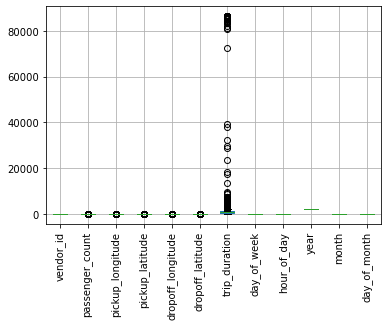

In [26]:
# check outliers by box plot
df.boxplot()
plt.xticks(rotation = 'vertical')
plt.show()

### **We can see in trip duration column there are much amount of outliers present, so first we have to drop them**

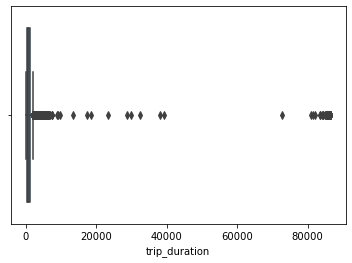

In [27]:
# find outliers in trip duration column by box plot
sns.boxplot(df.trip_duration)
plt.show()

## Remove Outliers By IQR

In [28]:
# remove outliers of trip duration column
q1 = df['trip_duration'].quantile(0.25)
q3 = df['trip_duration'].quantile(0.75)
iqr = q3-q1
first = q1-(1.5*iqr)
third = q1+(1.5*iqr)

In [29]:
df[df['trip_duration'] < third].shape[0]/df.shape[0]

0.8560027203264392

### **If we remove outliers from trip duration column, 15 % of data will be remove**

In [30]:
# remove outliers and create new dataframe
df2 = df[(df['trip_duration'] < third) & (df['trip_duration'] > first)]

In [31]:
df2.shape

(42795, 13)

# Question & Answers:-

# 1. Choose the most suitable evaluation metric and state why you chose it
# Answer:-

**We Have 6 Evaluation Metrics For Regression Problems, But For Given Dataset I Am Going To Use MSE Evaluation Metric
Because Our Dataset Comes With Outliers And Many Lower And Higher Range Values, And MSE Can Handle That Things
And Perform Very Well, Thats Why I Am Going To Use MSE, But We Can Use Other Evaluation Metrics As Well**

# 2. Build a benchmark model for the given dataset.
# Answer:-

In [32]:
# import shuffle to shuffle the data
from sklearn.utils import shuffle

# shuffle the data with random state 42
df3 = shuffle(df2, random_state= 42)

# creating 4 divisions for train and test
div = int(df3.shape[0]/4)

# creating train and test set
train = df3.loc[:3*div+1,:]
test = df3.loc[3*div+1:]

## Simple Mean (Mean Of trip_duration)

### Train Error

In [33]:
# create new column in train dataset by mean of trip duration of test dataset
train['simple_mean'] = test['trip_duration'].mean()

In [34]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error as mse

In [35]:
train_simple_mean_error = mse(train['trip_duration'],train['simple_mean'])
train_simple_mean_error

111105.56163509692

### Test Error

In [36]:
# create new column in test dataset by mean of trip duration of train dataset
test['simple_mean'] = train['trip_duration'].mean()

In [37]:
test_simple_mean_error = mse(test['trip_duration'],test['simple_mean'])
test_simple_mean_error

110060.71173327156

## Mean Trip Duration With Vendor Id

In [38]:
ven_id = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
ven_id

,trip_duration
vendor_id,
1,632.166627
2,631.888327


In [39]:
test['vend_id_mean'] = 0

for i in train['vendor_id'].unique():
    test['vend_id_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

In [40]:
ven_id_error = mse(test['trip_duration'], test['vend_id_mean'])
ven_id_error

502544.1163733115

## Mean Trip Duration With Passenger Count

In [41]:
pass_count = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
pass_count

,trip_duration
passenger_count,
1,629.402210
2,644.556359
3,653.268000
4,623.089474
5,616.251836
6,637.826923


In [42]:
test['pass_count_mean'] = 0

for i in train['passenger_count'].unique():
    test['pass_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [43]:
pass_count_error = mse(test['trip_duration'], test['pass_count_mean'])
pass_count_error

502544.1163733115

## Mean Trip Duration With Day Of Week

In [44]:
week_day = pd.pivot_table(train, values='trip_duration', index = ['day_of_week'], aggfunc=np.mean)
week_day

,trip_duration
day_of_week,
0,612.766846
1,646.114137
2,652.329050
3,652.897426
4,645.210096
5,625.498370
6,586.921175


In [45]:
test['week_day_mean'] = 0

for i in train['day_of_week'].unique():
    test['week_day_mean'][test['day_of_week'] == str(i)] = train['trip_duration'][train['day_of_week'] == str(i)].mean()

In [46]:
week_day_error = mse(test['trip_duration'], test['week_day_mean'])
week_day_error

502544.1163733115

## Mean Trip Duration With Hour Of Day

In [47]:
hour_day = pd.pivot_table(train, values='trip_duration', index = ['hour_of_day'], aggfunc=np.mean)
hour_day

,trip_duration
hour_of_day,
0,614.269697
1,610.636029
2,609.330749
3,576.304054
4,648.898477
5,553.540670
6,522.394209
7,584.368946
8,621.260095


In [48]:
test['hour_day_mean'] = 0

for i in train['hour_of_day'].unique():
    test['hour_day_mean'][test['hour_of_day'] == str(i)] = train['trip_duration'][train['hour_of_day'] == str(i)].mean()

In [49]:
hour_day_error = mse(test['trip_duration'], test['hour_day_mean'])
hour_day_error

502544.1163733115

### We Can See Our Simple Mean Model Is Performing Well Comparison Other Benchmark Model

# 3. Build a K-Nearest neighbours’ model for the given dataset and find the best value of K.
# Answer:-

In [50]:
# map value of store and fwd flag column
df2['store_and_fwd_flag'] = df2['store_and_fwd_flag'].map({'N':0,'Y':1})

In [51]:
df2.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,year,month,day_of_month
0,1,1,-73.967026,40.772392,-73.956032,40.769524,0,673,1,15,2016,1,12
1,2,1,-73.971046,40.787750,-73.951271,40.771992,0,1030,3,11,2016,3,31
2,1,2,-73.998093,40.757507,-73.985916,40.746597,0,416,0,19,2016,1,11
3,2,1,-73.990631,40.738735,-73.990746,40.738056,0,228,1,18,2016,2,9
4,2,1,-73.959160,40.763332,-73.974319,40.752491,0,761,4,17,2016,2,26


## Split Dependent And Independent Variable

In [52]:
X = df2.drop('trip_duration', axis = 1)
y = df2['trip_duration']

In [53]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Scale Data By Standard Scaller

In [54]:
# data scaling by standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
# import KNN Regressor and MSE Evaluation Metric 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

score = mse(y_test, y_pred)
score

74396.7812034116

## Elbow Curve For Regressor

In [56]:
def elbow(k):
    test_error = []
    for i in k:
        knn_reg = KNeighborsRegressor(n_neighbors = i)
        knn_reg.fit(X_train,y_train)
        y_pred = knn_reg.predict(X_test)
        score = mse(y_pred,y_test)
        test_error.append(score)
    return test_error

In [57]:
k = range(1,40)
testt = elbow(k)

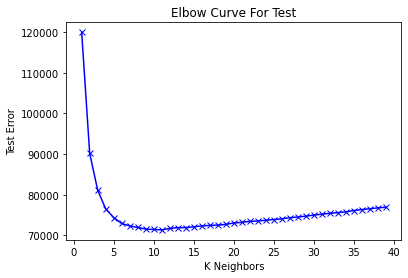

In [58]:
plt.plot(k,testt, 'bx-')
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve For Test')
plt.show()

### Based On Elbow Curve Visualization, We Can See K = 11 Giving Us Very Low Error, So We Will Take 11 As Our K Value

In [59]:
knn_reg = KNeighborsRegressor(n_neighbors = 11)
knn_reg.fit(X_train,y_train)
y_pred = knn_reg.predict(X_test)
knn_train_score = mse(y_train, knn_reg.predict(X_train))
knn_test_score = mse(y_test, y_pred)
print('KNN Train Score:', knn_train_score)
print('KNN Test Score:', knn_test_score)

KNN Train Score: 58614.881253989086
KNN Test Score: 71359.51593846892


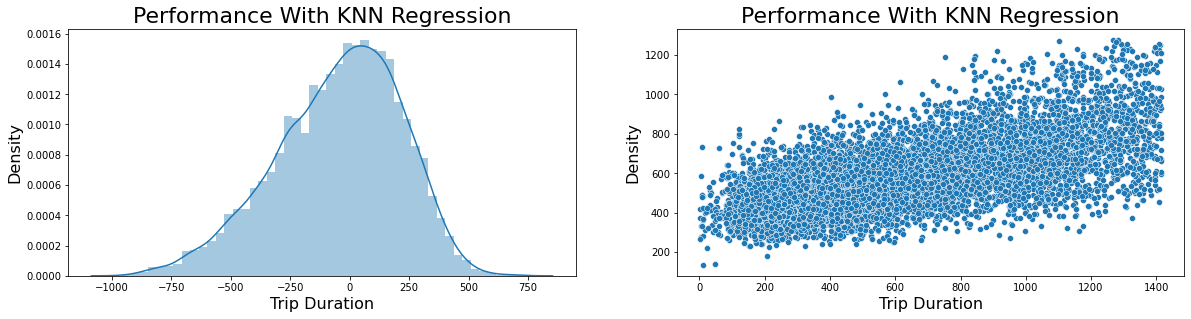

In [60]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With KNN Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With KNN Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# 4. Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.
# Answer:-

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_score = mse(y_test,y_pred)
lr_score

109414.47707334299

In [62]:
lr.coef_

array([-5.19829686e-01,  3.98751720e+00, -1.89271929e+01, -1.16485042e+01,
        5.65809922e+01, -3.36560477e+01,  1.63220067e+00, -8.32855556e+00,
        1.56484227e+01,  1.00364161e-13,  7.83150138e+00, -3.80417553e-01])

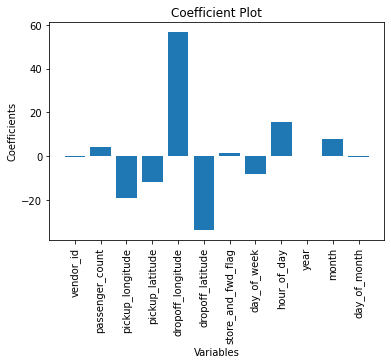

In [63]:
xx = X.columns
yy = lr.coef_
plt.bar(xx,yy)
plt.xlabel('Variables')
plt.xticks(rotation = 'vertical')
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')
plt.show()

In [64]:
residuals = pd.DataFrame({

'fitted_values': y_test,
'predicted_values': y_pred})

residuals['residuals'] = residuals['fitted_values'] - residuals['predicted_values']
residuals.head()

,fitted_values,predicted_values,residuals
35841,692,588.174255,103.825745
22215,872,626.540976,245.459024
6909,709,595.793604,113.206396
8120,319,634.797098,-315.797098
26596,228,581.870220,-353.870220


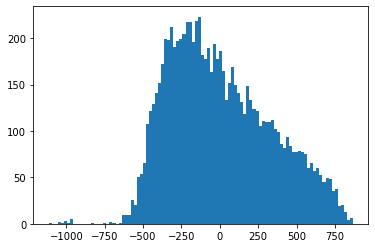

In [65]:
plt.hist(residuals.residuals, bins = 100)
plt.show()

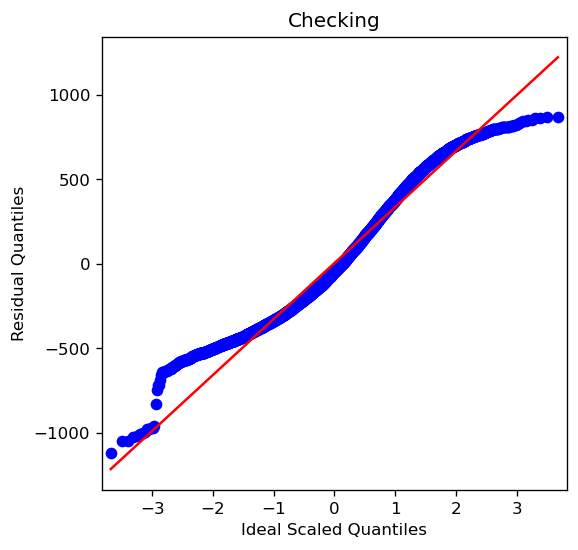

In [66]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot
##Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5), dpi = 120)
qqplot(residuals.residuals, line = 's', ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking')
plt.show()

### We Can See For 60 % Quantiles Its Fit Well

In [67]:
variable_coef = pd.DataFrame({
    'variables': X.columns,
    'coefficients': lr.coef_
})

variable_coef.head()

,variables,coefficients
0,vendor_id,-0.519830
1,passenger_count,3.987517
2,pickup_longitude,-18.927193
3,pickup_latitude,-11.648504
4,dropoff_longitude,56.580992


### Chossing variables with sigificance greater than 0.5 (Filtering Significant Features)

In [68]:
sig_var = variable_coef[variable_coef.coefficients > 0.5]

### Extracting the significant subset do independent Variables

In [69]:
subset = df2[sig_var['variables'].values] 
subset.head()

,passenger_count,dropoff_longitude,store_and_fwd_flag,hour_of_day,month
0,1,-73.956032,0,15,1
1,1,-73.951271,0,11,3
2,2,-73.985916,0,19,1
3,1,-73.990746,0,18,2
4,1,-73.974319,0,17,2


In [70]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(subset,y,test_size=0.3)

In [71]:
lr = LinearRegression()
lr.fit(X_train2,y_train2)
y_pred2 = lr.predict(X_test2)
lr_train_score = mse(y_train2, lr.predict(X_train2))
lr_test_score = mse(y_test2, y_pred2)
print('LR Train Score:', lr_train_score)
print('LR Test Score:', lr_test_score)

LR Train Score: 109498.6457598188
LR Test Score: 110275.18142869965


### Linear Regression Final Coefficient & Intercept

In [72]:
lr.coef_

array([  1.80088622, 684.54472278,  15.26882839,   2.14305419,
         5.6576108 ])

In [73]:
lr.intercept_

51215.61620077867

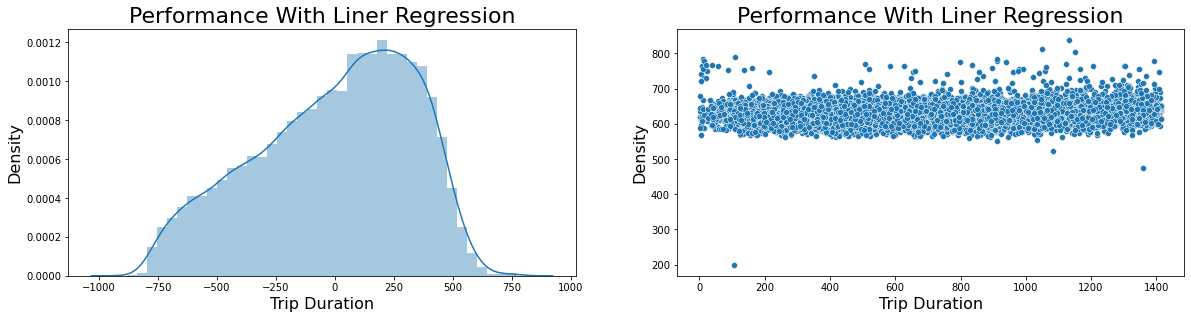

In [74]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred2-y_test2)
plt.title('Performance With Liner Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test2,y_pred2)
plt.title('Performance With Liner Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# Ridge And Lasso Regression

## Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params_grid = {'alpha' : [0, 1e-8, 1e-5, 1e-3, 1e-2, 1, 2, 4, 5, 10, 20]}
greed_rid = GridSearchCV(ridge,params_grid,cv = 10, n_jobs = 1,scoring = 'neg_mean_squared_error')

greed_rid.fit(X_train,y_train)
ridge_train_score = mse(y_train, greed_rid.predict(X_train))
y_pred = greed_rid.predict(X_test)
ridge_test_score = mse(y_test,y_pred)


print('Ridge Train Score:', ridge_train_score)
print('Ridge Test Score:', ridge_test_score)
print('Best Alpha Value:', greed_rid.best_params_)

Ridge Train Score: 107645.23492198289
Ridge Test Score: 109414.19232039504
Best Alpha Value: {'alpha': 20}


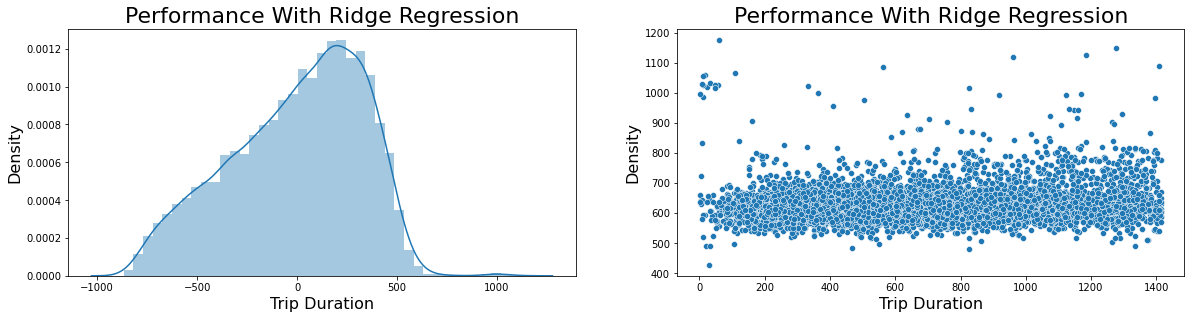

In [76]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With Ridge Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With Ridge Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

## Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
params_grid = {'alpha' : [0, 1e-8, 1e-5, 1e-3, 1e-2, 1, 2, 4, 5, 10, 20]}
greed_lass = GridSearchCV(lasso,params_grid,cv = 10, n_jobs = 1,scoring = 'neg_mean_squared_error')

greed_lass.fit(X_train,y_train)
lasso_train_score = mse(y_train, greed_lass.predict(X_train))
y_pred = greed_lass.predict(X_test)
lasso_test_score = mse(y_test,y_pred)


print('Lasso Train Score:', lasso_train_score)
print('Lasso Test Score:', lasso_test_score)
print('Best Alpha Value:', greed_rid.best_params_)

Lasso Train Score: 107645.23039308368
Lasso Test Score: 109414.17059996555
Best Alpha Value: {'alpha': 20}


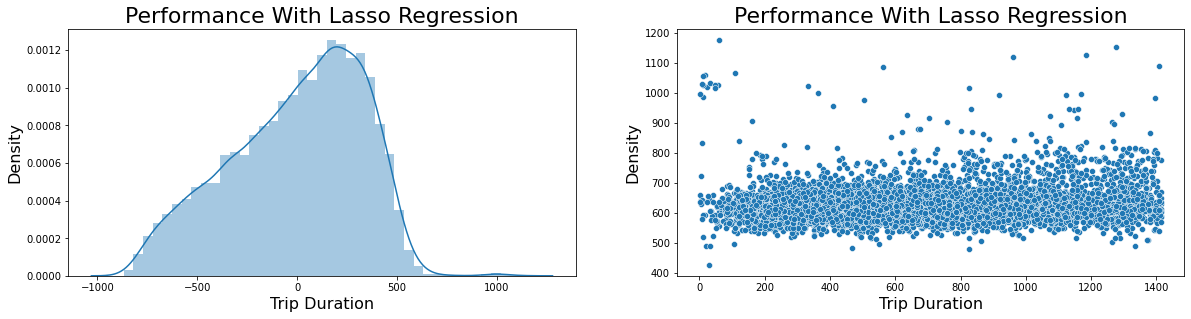

In [78]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With Lasso Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With Lasso Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

# 5. Build a Decision tree model for the given dataset. Attempt to interpret the variable importance.
# Answer:-

In [79]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

params_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30,50,100]}

greed_dtr = GridSearchCV(dtr,params_grid,cv = 10, n_jobs = 1,scoring = 'neg_mean_squared_error')
greed_dtr.fit(X_train,y_train)
dtr_train_score = mse(y_train,greed_dtr.predict(X_train))
y_pred = greed_dtr.predict(X_test)
dtr_test_score = mse(y_test,y_pred)


print('DTR Train Score:', dtr_train_score)
print('DTR Test Score:', dtr_test_score)
print('Best Max Depth Value:', greed_dtr.best_estimator_)

DTR Train Score: 66537.84105830992
DTR Test Score: 72348.65889447462
Best Max Depth Value: DecisionTreeRegressor(max_depth=10)


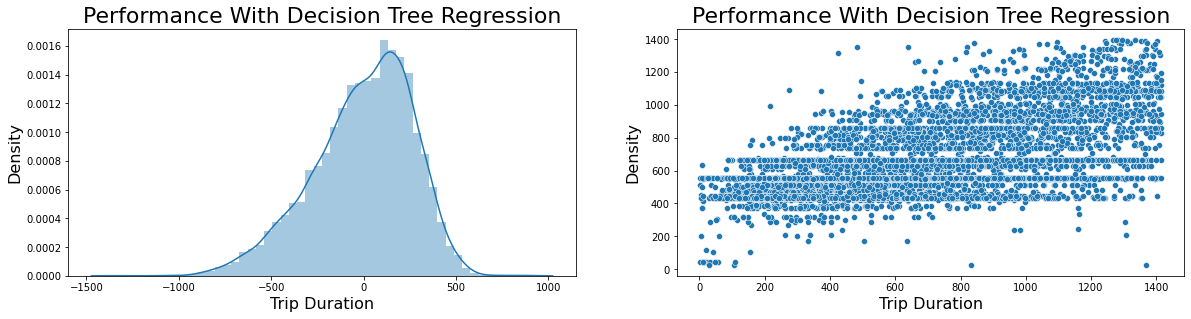

In [80]:
# visualize the performance of our model
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(y_pred-y_test)
plt.title('Performance With Decision Tree Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)


plt.subplot(2,2,2)
sns.scatterplot(y_test,y_pred)
plt.title('Performance With Decision Tree Regression',fontsize = 22)
plt.xlabel('Trip Duration',fontsize = 16)
plt.ylabel('Density',fontsize = 16)

plt.show()

### Feature Impotrance Of Decision Tree Regressor

In [81]:
feature_importance = pd.DataFrame({
    'Variables': X.columns,
    'Feature Importance': greed_dtr.best_estimator_.feature_importances_*100
})

feature_importance = feature_importance.sort_values('Feature Importance', ascending=False)

In [82]:
feature_importance

,Variables,Feature Importance
3,pickup_latitude,43.118110
5,dropoff_latitude,27.865531
2,pickup_longitude,13.214761
4,dropoff_longitude,9.165591
8,hour_of_day,4.326895
7,day_of_week,1.330911
1,passenger_count,0.334497
11,day_of_month,0.326209
10,month,0.187204
0,vendor_id,0.119607


## Create Dataframe For Store Models And There Train & Test Scores

In [83]:
mse_scores = pd.DataFrame({"Models":["Benchmark Model", "Linear regression", "Ridge Regressor", "Lasso Regression", "KNN Regressor","Decision Tree Regressor"],
                       "Train_Scores":[train_simple_mean_error,lr_train_score,ridge_train_score,lasso_train_score,knn_train_score,dtr_train_score],
                       "Test_Scores":[test_simple_mean_error,lr_test_score,ridge_test_score,lasso_test_score,knn_test_score,dtr_test_score]})

In [84]:
mse_scores

,Models,Train_Scores,Test_Scores
0,Benchmark Model,111105.561635,110060.711733
1,Linear regression,109498.645760,110275.181429
2,Ridge Regressor,107645.234922,109414.192320
3,Lasso Regression,107645.230393,109414.170600
4,KNN Regressor,58614.881254,71359.515938
5,Decision Tree Regressor,66537.841058,72348.658894


# 6. Plot the following Bar plots:
# 0. train score of all the above models.
# Answer:-

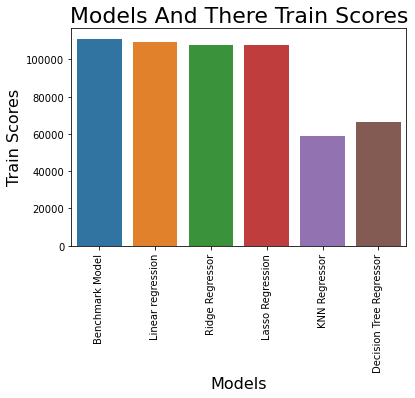

In [85]:
sns.barplot(x = mse_scores.Models,y = mse_scores.Train_Scores)
plt.title('Models And There Train Scores',fontsize = 22)
plt.xlabel('Models',fontsize = 16)
plt.xticks(rotation = 'vertical')
plt.ylabel('Train Scores',fontsize = 16)
plt.show()

# 1. test (not validation!) score of all the above models.
# Answer:-

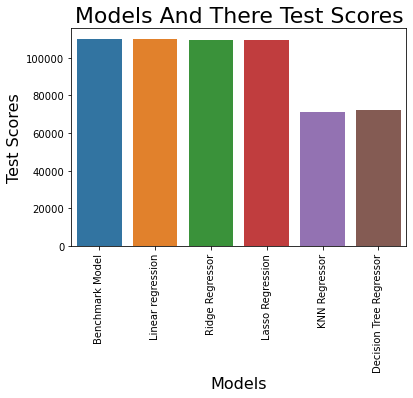

In [86]:
sns.barplot(x = mse_scores.Models,y = mse_scores.Test_Scores)
plt.title('Models And There Test Scores',fontsize = 22)
plt.xlabel('Models',fontsize = 16)
plt.xticks(rotation = 'vertical')
plt.ylabel('Test Scores',fontsize = 16)
plt.show()

# 2. Attempt to explain the observations from the plots (optional)
# Answer:-

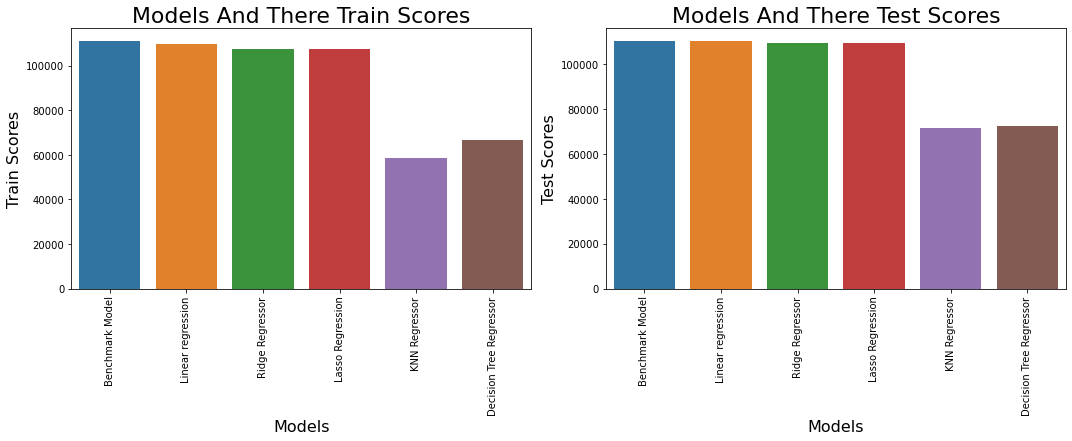

In [88]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = mse_scores.Models,y = mse_scores.Train_Scores)
plt.title('Models And There Train Scores',fontsize = 22)
plt.xlabel('Models',fontsize = 16)
plt.xticks(rotation = 'vertical')
plt.ylabel('Train Scores',fontsize = 16)

plt.subplot(2,2,2)
sns.barplot(x = mse_scores.Models,y = mse_scores.Test_Scores)
plt.title('Models And There Test Scores',fontsize = 22)
plt.xlabel('Models',fontsize = 16)
plt.xticks(rotation = 'vertical')
plt.ylabel('Test Scores',fontsize = 16)

plt.tight_layout()
plt.show()

1. At the time of training dtr model train very well in compersion with other models and also at the time of testing it's performing very well.
2. After dtr, KNN train well and also at the time of testing it performs well compersion other ML models except dtr model.
3. Benchmark model gave higher mse score at both training and testing time.
4. After evaluating all the models we can say Decision Tree Regressor & KNN Regressor are the best ML model for a given dataset.